### SUPERDENSE CODING

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [7]:
# STEP1: Create a bell state -> entangled pair of two qubits
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.barrier()

In [8]:
# STEP2: Alice encodes a message (two classical bits using a single qubit)

message = "11"

if message == "00":
    qc.i(0)
elif message == "01":
    qc.z(0)
elif message == "10":
    qc.x(0)
elif message == "11":
    qc.z(0)
    qc.x(0)
    
qc.barrier()

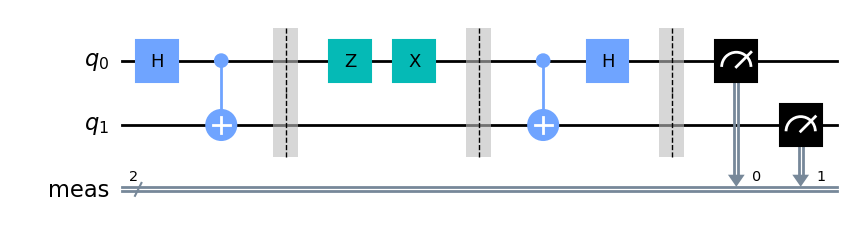

In [9]:
# STEP3: Bob decodes the encoded messsage sent by Alice

qc.cx(0, 1)
qc.h(0)
qc.measure_all()

qc.draw(output="mpl")

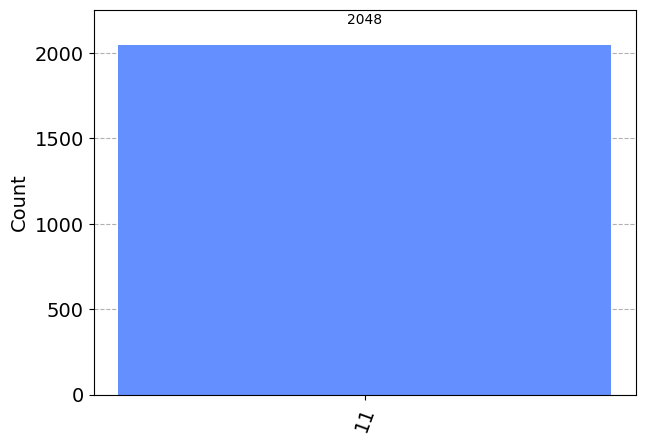

In [11]:
backend = Aer.get_backend("qasm_simulator")
result = execute(qc, backend, shots=2048).result().get_counts(qc)
plot_histogram(result)